In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np


In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('/content/drive/MyDrive/chest_xray/train')
test = get_training_data('/content/drive/MyDrive/chest_xray/test')
val = get_training_data('/content/drive/MyDrive/chest_xray/val')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
#plt.imshow(train[0][0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


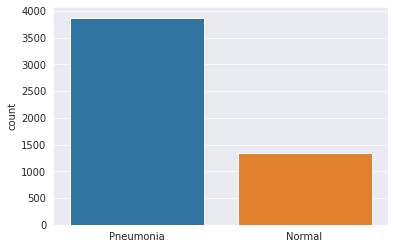

In [4]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l) 

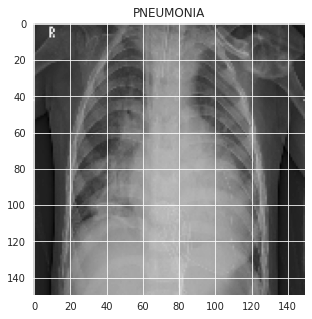

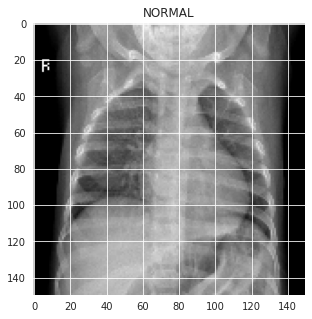

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]]);

In [6]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [8]:
type(x_train)

list

In [9]:
x_train_arr = np.array(x_train)

In [10]:
x_test_arr = np.array(x_test)

In [11]:
x_train_test.shape

NameError: ignored

In [12]:
from sklearn.preprocessing import Normalizer 

In [13]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.7.
The scikit-learn version is 1.0.2.


In [14]:
#this is about wjere 

In [15]:
train[0][0].max(axis=(0,1))

253

In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss

In [17]:
from sklearn.decomposition import PCA, NMF, FactorAnalysis

In [18]:
x_train_r = x_train_arr.reshape(5216, 22500)

In [19]:
x_test_r = x_test_arr.reshape(624, 22500)

In [20]:
x_train_r.shape


(5216, 22500)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x_train_ss = scaler.fit_transform(x_train_r)

x_test_ss = scaler.transform(x_test_r)

In [22]:
x_train_ss

array([[-0.15212669, -0.24597799, -0.14148533, ...,  0.75895635,
         0.75211377,  0.70264568],
       [-0.91597833, -0.92948245, -1.00900282, ..., -0.57001125,
        -0.54824428, -0.53133202],
       [-0.3570625 , -0.44602808, -0.43065783, ...,  2.45879862,
         2.91937718,  1.0757087 ],
       ...,
       [ 0.68624706,  0.43752646,  0.55252866, ..., -0.57001125,
        -0.54824428, -0.53133202],
       [ 0.07143964,  0.12078049,  0.51397232, ..., -0.57001125,
        -0.54824428, -0.53133202],
       [-0.91597833, -0.92948245, -1.02828098, ..., -0.57001125,
        -0.54824428, -0.53133202]])

In [23]:
from sklearn.metrics import (classification_report, confusion_matrix, 
                             plot_confusion_matrix, roc_curve, auc,
                             roc_auc_score, f1_score)

from time import time 

In [24]:
# We fit the first logistic regression without modifying the X
t0 = time()
clf = LogisticRegression()
clf.fit (x_train_ss, y_train)
print(f"With {x_train_ss.shape[1]} variables it is done in %0.3fs" % (time() - t0))
print(f'score : {round(clf.score(x_test_ss, y_test), 3)}')

With 22500 variables it is done in 20.639s
score : 0.772


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [25]:
# We first applying PCA on X before fitting the logistic regression
dim = PCA(400)
x_train_PCA = dim.fit_transform(x_train_ss)
x_test_PCA = dim.transform(x_test_ss)


In [26]:

t0 = time()
clf = LogisticRegression()
clf.fit (x_train_PCA, y_train)
print("With 400 variables, it is done in %0.3fs" % (time() - t0))
print(f"score: {round(clf.score(x_test_PCA, y_test), 3)}")

With 400 variables, it is done in 0.319s
score: 0.737


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# my_model = LogisticRegression(
#             C=1e3,             # Smaller values -> more regularization
#             max_iter=1e3,      # Ensure we eventually reach a solution
#             solver='lbfgs',    # (Default) Can optimize depending on problem
#             multi_class='ovr'  # (Default) Will try to do multiclass classification 
# )

In [ ]:
# Fit/Train the model
# my_model.fit(x_train_PCA, y_train)
# my_model

In [27]:
from sklearn.model_selection import train_test_split, cross_validate

In [29]:
cv_results = cross_validate(
                    estimator=clf,
                    X=x_train_PCA,
                    y=y_train,
                    cv=5,
                    return_train_score=True
)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [30]:
cv_results

{'fit_time': array([0.26202893, 0.25851846, 0.23527694, 0.23115063, 0.28242922]),
 'score_time': array([0.00939107, 0.00167656, 0.0047915 , 0.00169659, 0.00168276]),
 'test_score': array([0.95402299, 0.92905081, 0.93863854, 0.92329818, 0.92713327]),
 'train_score': array([0.99736337, 0.99976036, 0.99520728, 0.99832255, 0.99976036])}

In [31]:
cv_results['train_score']

array([0.99736337, 0.99976036, 0.99520728, 0.99832255, 0.99976036])

In [32]:
cv_results['test_score']

array([0.95402299, 0.92905081, 0.93863854, 0.92329818, 0.92713327])

In [33]:
def cv_overall(cv_results):
    val_results = cv_results['test_score']
    result_str = f'{val_results.mean():.3f} ± {val_results.std():.3f}'
    return result_str

In [ ]:
# # Let's save these results for later
# models = {}

# models['model_1'] = {'model': my_model, 'cv':cv_results}

In [ ]:
# # Adjust the regularization C (remember for logistical, smaller = stronger penalization )
# c_values = [1e-1, 1e2, 1e4, 1e6]

# #like above, could also try different solvers 
# #solver = ['sag', 'lbfgs', 'saga']

# # Start at #2 since we have "model_1" already
# for i, c in enumerate(c_values, start=2):
    
#     print(f'Model #{i} with C={c}')
#     new_model = LogisticRegression(C=c, max_iter=1e3)
    
#     # Cross-validation
#     print('Cross-validating model with training data...')
#     cv_results = cross_validate(
#                     estimator=new_model,
#                     X=x_train_PCA,
#                     y=y_train,
#                     #solver = ...
#                     cv=5,
#                     return_train_score=True
#     )
#     print(f'\tCross-Validation Score: {cv_overall(cv_results)}')
    
#     # Train/fit with the full training set
#     #print('Fitting model to full training set...')
#     #new_model.fit(x_train_PCA, y_train)
#     #train_score = new_model.score(x_train_PCA, y_train)
#     #print(f'\tScore on training set: {train_score:.3f}')
    
#     # Save results
#     print('Saving Results...')
#     models[f'model_{i}'] = {'model': new_model, 'cv': cv_results}
    
#     print('\n','-'*30,'\n')

In [ ]:
# best_model = models['model_2']['model']
# best_model

In [ ]:
# # Normalize the data
# x_train = np.array(x_train) / 253
# x_val = np.array(x_val) / 253
# x_test = np.array(x_test) / 253

In [35]:
#turn into arrays 
x_train = np.array(x_train) 
x_val = np.array(x_val) 
x_test = np.array(x_test) 

In [36]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [37]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)




(5216, 150, 150, 1)
(16, 150, 150, 1)
(624, 150, 150, 1)


In [38]:
train_img = x_train.reshape(x_train.shape[0], -1)
test_img = x_test.reshape(x_test.shape[0], -1)
val_img = x_val.reshape(x_val.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 22500)
(624, 22500)
(16, 22500)


In [39]:
y_train.shape

(5216,)

## Baseline CNN Model

In [40]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models


# Build a baseline fully connected model
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(22500,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, y_val))

Epoch 1/50
163/163 [==============================] - 3s 9ms/step - loss: 7764.4688 - accuracy: 0.7412 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 2/50
163/163 [==============================] - 1s 8ms/step - loss: 0.6105 - accuracy: 0.7429 - val_loss: 0.7299 - val_accuracy: 0.5000
Epoch 3/50
163/163 [==============================] - 1s 8ms/step - loss: 0.5897 - accuracy: 0.7429 - val_loss: 0.7522 - val_accuracy: 0.5000
Epoch 4/50
163/163 [==============================] - 1s 8ms/step - loss: 0.5799 - accuracy: 0.7429 - val_loss: 0.7707 - val_accuracy: 0.5000
Epoch 5/50
163/163 [==============================] - 1s 8ms/step - loss: 0.5751 - accuracy: 0.7429 - val_loss: 0.7852 - val_accuracy: 0.5000
Epoch 6/50
163/163 [==============================] - 1s 8ms/step - loss: 0.5726 - accuracy: 0.7429 - val_loss: 0.7963 - val_accuracy: 0.5000
Epoch 7/50
163/163 [==============================] - 1s 8ms/step - loss: 0.5714 - accuracy: 0.7429 - val_loss: 0.8045 - val_accuracy: 0.5000
Epo

In [42]:
results_train = model.evaluate(train_img, y_train)

163/163 [==============================] - 1s 5ms/step - loss: 0.5700 - accuracy: 0.7429


In [43]:
results_test = model.evaluate(test_img, y_test)

20/20 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.6250


In [44]:
results_train

[0.5699948668479919, 0.7429064512252808]

In [45]:
results_test

[0.6949604749679565, 0.625]

## Build a CNN

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150 ,150,  1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [47]:
# Normalize the data
x_train = np.array(x_train) / 253
x_val = np.array(x_val) / 253
x_test = np.array(x_test) / 253

In [48]:
history = model.fit(x_train,
                    y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/15
  7/163 [>.............................] - ETA: 2:22 - loss: 0.6488 - acc: 0.7500

KeyboardInterrupt: ignored

In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)